In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [180]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header = None)
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [182]:
df['len_mean'] =  np.cbrt(df['diameter'] * df['height'] * df['length'])

In [183]:
df.drop(['length', 'diameter', 'height', 'shucked_weight', 'viscera_weight', 'shell_weight'], axis = 1, inplace = True)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           4177 non-null   object 
 1   whole_weight  4177 non-null   float64
 2   rings         4177 non-null   int64  
 3   len_mean      4177 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 130.7+ KB


In [185]:
df.corr()

,whole_weight,rings,len_mean
whole_weight,1.000000,0.540390,0.930136
rings,0.540390,1.000000,0.592405
len_mean,0.930136,0.592405,1.000000


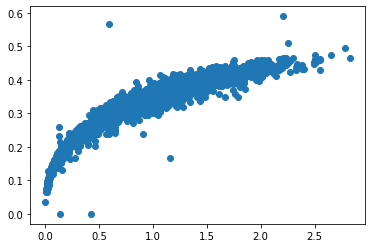

In [175]:
plt.scatter(df["whole_weight"], df["len_mean"])

In [186]:
def sexToDummy(sex):
  if sex == 'I':
    return 1
  else:
    return 0

df['sex'] = df['sex'].apply(sexToDummy)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           4177 non-null   int64  
 1   whole_weight  4177 non-null   float64
 2   rings         4177 non-null   int64  
 3   len_mean      4177 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 130.7 KB


In [188]:
from sklearn.model_selection import train_test_split

X = df.drop('rings', axis = 1)
y = df['rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [211]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
print("Mean squared error: {0}\nMean absolute error: {1}".format(mse, mae))

Mean squared error: 6.248564780795372
Mean absolute error: 1.8172249472726454


In [209]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
print("Mean squared error: {0}\nMean absolute error: {1}".format(mse, mae))

Mean squared error: 7.748175932318104, 
Mean absolute error: 2.0164334058496496


In [210]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
print("Mean squared error: {0}\nMean absolute error: {1}".format(mse, mae))

Mean squared error: 6.710450475476824
Mean absolute error: 1.7026459435577004


In [ ]:
# new type of dataset, and I learnt something new as well.
# i dropped all weights because they were highly correlated with each other.
# dropped length, height, diameter and replaced with their geometric mean
# i don't think my models are accurate enough, I'll search for how to make models more accurate now